In [1]:
import polars as pl 

In [2]:
join_cols = ["model"]
exclusions = ["leading_space_tokens_count", "xcopa"]

### Read Tokenizer Metrics

In [3]:
tok_metrics = pl.read_csv("raw_metrics/monogold_tok_metrics.csv")
tok_metrics = tok_metrics.rename({"tokenizer": "model"})

In [4]:
tok_metrics

model,vocab_size,fertility,renyi_efficiency_a_1,renyi_efficiency_a_2,renyi_efficiency_a_2_5,unigram_entropy,compression_ratio_global_mean,bigrams_entropy,average_token_rank,corr_chunkability_rt_mean,corr_chunkability_rt_z,corr_chunkability_accuracy,encoding_length,avg_chars_per_token,n_tokens,u_mean,u_median,final_tokens_count,used_in_merges,leading_space_tokens_count,leading_space_tokens_share,AUC_zipf,SLOPE_zipf,POWER_LAW_MAE_zipf,macro_precision,macro_recall
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64
"""mono_gold_130m_pre_lr1e-4_eng_…",114691,0.205287,10.816857,7.022492,6.414314,10.816857,0.02349,16.886528,3100.873489,0.080952,0.058236,0.17663,66.4868,4.941983,664868,1.432246,1.072469,65293,49398,1,0.000009,60.365702,-1.198192,0.144556,0.01402,0.015045
"""mono_gold_130m_pre_lr1e-4_eng_…",16387,0.235709,10.516885,7.353031,6.718876,10.516885,0.020453,16.921349,1335.853559,-0.351907,-0.368697,0.29348,76.1358,4.319667,761358,2.762021,2.520013,10715,5672,1,0.000061,61.50204,-1.150967,0.262616,0.145153,0.154938
"""mono_gold_130m_pre_lr1e-4_eng_…",32771,0.217096,10.760274,7.166071,6.54166,10.760274,0.022189,16.97507,2176.370748,-0.346083,-0.369956,0.389286,70.2464,4.682546,702464,2.113433,1.814037,19507,13264,1,0.000031,61.143964,-1.246688,0.241508,0.065156,0.068551
"""mono_gold_130m_pre_lr1e-4_eng_…",49155,0.211486,10.808753,7.099466,6.481898,10.808753,0.022777,16.946855,2586.573293,-0.233632,-0.266602,0.37879,68.4538,4.802546,684538,1.888796,1.575735,28690,20465,1,0.00002,60.826226,-1.249103,0.197413,0.038387,0.04016
"""mono_gold_130m_pre_lr1e-4_eng_…",65539,0.208749,10.820981,7.066069,6.452372,10.820981,0.023095,16.924019,2817.00453,-0.12749,-0.158651,0.323635,67.5866,4.863266,675866,1.746457,1.452556,37930,27609,1,0.000015,60.63366,-1.23225,0.162589,0.025911,0.027299
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""mono_gold_130m_pre_lr1e-4_eng_…",49156,0.225266,10.218742,6.872336,6.354685,10.218742,0.021543,16.466006,1935.475694,-0.135876,-0.165512,0.288676,72.855,4.525429,728550,1.63726,1.245974,35365,13791,1,0.00002,61.316778,-1.292291,0.196831,0.350308,0.365486
"""mono_gold_130m_pre_lr1e-4_eng_…",65540,0.223184,10.25475,6.869663,6.349453,10.25475,0.021736,16.47379,2070.516712,-0.091435,-0.116774,0.245626,72.1981,4.563604,721981,1.494568,1.088934,46035,19505,1,0.000015,61.186191,-1.281138,0.168419,0.345492,0.357802
"""mono_gold_130m_pre_lr1e-4_eng_…",8196,0.307413,8.697971,6.522155,6.091765,8.697971,0.015845,15.124056,337.11149,-0.276278,-0.289853,0.195996,98.5968,3.351422,985968,3.124531,2.964032,7350,846,1,0.000122,61.472294,-1.381607,0.519662,0.421983,0.526773


In [5]:
tok_cols = [c for c in tok_metrics.columns if (c not in join_cols) and (c not in exclusions)]

In [6]:
tok_cols

['vocab_size',
 'fertility',
 'renyi_efficiency_a_1',
 'renyi_efficiency_a_2',
 'renyi_efficiency_a_2_5',
 'unigram_entropy',
 'compression_ratio_global_mean',
 'bigrams_entropy',
 'average_token_rank',
 'corr_chunkability_rt_mean',
 'corr_chunkability_rt_z',
 'corr_chunkability_accuracy',
 'encoding_length',
 'avg_chars_per_token',
 'n_tokens',
 'u_mean',
 'u_median',
 'final_tokens_count',
 'used_in_merges',
 'leading_space_tokens_share',
 'AUC_zipf',
 'SLOPE_zipf',
 'POWER_LAW_MAE_zipf',
 'macro_precision',
 'macro_recall']

### Read Model Metrics

In [7]:
mod_metrics = pl.read_csv("raw_metrics/monogold_mod_metrics.csv")
mod_metrics = mod_metrics.select(pl.exclude("tokenizer"))

In [8]:
mod_metrics

model,blimp,xcopa,squad_v2,hellaswag,winogrande,math-1digit,math-2digit
str,f64,f64,f64,f64,f64,f64,f64
"""mono_gold_130m_pre_lr1e-4_eng_…",0.58566,0.51236,0.12739,0.26618,0.48934,0.08667,0.00745
"""mono_gold_130m_pre_lr1e-4_eng_…",0.59996,0.51364,0.12657,0.25951,0.48382,0.13111,0.00392
"""mono_gold_130m_pre_lr1e-4_eng_…",0.61337,0.51345,0.12789,0.25573,0.51066,0.12444,0.00497
"""mono_gold_130m_pre_lr1e-4_eng_…",0.65378,0.51527,0.12657,0.25413,0.50197,0.12889,0.0037
"""mono_gold_130m_pre_lr1e-4_eng_…",0.64155,0.51382,0.13275,0.25563,0.50592,0.11,0.0037
…,…,…,…,…,…,…,…
"""mono_gold_130m_pre_lr1e-4_eng_…",0.63984,0.51491,0.12732,0.25812,0.50592,0.11889,0.00527
"""mono_gold_130m_pre_lr1e-4_eng_…",0.62628,0.518,0.12972,0.25732,0.49645,0.10667,0.00376
"""mono_gold_130m_pre_lr1e-4_eng_…",0.60187,0.51818,0.1277,0.25642,0.49803,0.12444,0.00391


In [9]:
mod_cols = [c for c in mod_metrics.columns if (c not in join_cols) and (c not in exclusions)]

In [10]:
mod_cols

['blimp', 'squad_v2', 'hellaswag', 'winogrande', 'math-1digit', 'math-2digit']

### Merged

In [11]:
joined_metrics = tok_metrics.join(
    mod_metrics,
    how='inner', 
    on=['model'],
    nulls_equal=True,
)

In [12]:
joined_metrics

model,vocab_size,fertility,renyi_efficiency_a_1,renyi_efficiency_a_2,renyi_efficiency_a_2_5,unigram_entropy,compression_ratio_global_mean,bigrams_entropy,average_token_rank,corr_chunkability_rt_mean,corr_chunkability_rt_z,corr_chunkability_accuracy,encoding_length,avg_chars_per_token,n_tokens,u_mean,u_median,final_tokens_count,used_in_merges,leading_space_tokens_count,leading_space_tokens_share,AUC_zipf,SLOPE_zipf,POWER_LAW_MAE_zipf,macro_precision,macro_recall,blimp,xcopa,squad_v2,hellaswag,winogrande,math-1digit,math-2digit
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mono_gold_130m_pre_lr1e-4_eng_…",8195,0.285582,9.754047,7.622233,7.048846,9.754047,0.016853,16.277668,509.624286,-0.234306,-0.240397,0.170762,91.731,3.570538,917310,3.923955,3.951568,6551,1644,1,0.000122,60.717266,-1.301415,0.606172,0.215332,0.251678,0.58566,0.51236,0.12739,0.26618,0.48934,0.08667,0.00745
"""mono_gold_130m_pre_lr1e-4_eng_…",16387,0.235709,10.516885,7.353031,6.718876,10.516885,0.020453,16.921349,1335.853559,-0.351907,-0.368697,0.29348,76.1358,4.319667,761358,2.762021,2.520013,10715,5672,1,0.000061,61.50204,-1.150967,0.262616,0.145153,0.154938,0.59996,0.51364,0.12657,0.25951,0.48382,0.13111,0.00392
"""mono_gold_130m_pre_lr1e-4_eng_…",32771,0.217096,10.760274,7.166071,6.54166,10.760274,0.022189,16.97507,2176.370748,-0.346083,-0.369956,0.389286,70.2464,4.682546,702464,2.113433,1.814037,19507,13264,1,0.000031,61.143964,-1.246688,0.241508,0.065156,0.068551,0.61337,0.51345,0.12789,0.25573,0.51066,0.12444,0.00497
"""mono_gold_130m_pre_lr1e-4_eng_…",49155,0.211486,10.808753,7.099466,6.481898,10.808753,0.022777,16.946855,2586.573293,-0.233632,-0.266602,0.37879,68.4538,4.802546,684538,1.888796,1.575735,28690,20465,1,0.00002,60.826226,-1.249103,0.197413,0.038387,0.04016,0.65378,0.51527,0.12657,0.25413,0.50197,0.12889,0.0037
"""mono_gold_130m_pre_lr1e-4_eng_…",65539,0.208749,10.820981,7.066069,6.452372,10.820981,0.023095,16.924019,2817.00453,-0.12749,-0.158651,0.323635,67.5866,4.863266,675866,1.746457,1.452556,37930,27609,1,0.000015,60.63366,-1.23225,0.162589,0.025911,0.027299,0.64155,0.51382,0.13275,0.25563,0.50592,0.11,0.0037
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""mono_gold_130m_pre_lr1e-4_eng_…",49156,0.225266,10.218742,6.872336,6.354685,10.218742,0.021543,16.466006,1935.475694,-0.135876,-0.165512,0.288676,72.855,4.525429,728550,1.63726,1.245974,35365,13791,1,0.00002,61.316778,-1.292291,0.196831,0.350308,0.365486,0.63984,0.51491,0.12732,0.25812,0.50592,0.11889,0.00527
"""mono_gold_130m_pre_lr1e-4_eng_…",65540,0.223184,10.25475,6.869663,6.349453,10.25475,0.021736,16.47379,2070.516712,-0.091435,-0.116774,0.245626,72.1981,4.563604,721981,1.494568,1.088934,46035,19505,1,0.000015,61.186191,-1.281138,0.168419,0.345492,0.357802,0.62628,0.518,0.12972,0.25732,0.49645,0.10667,0.00376
"""mono_gold_130m_pre_lr1e-4_eng_…",81924,0.222144,10.271238,6.867615,6.346172,10.271238,0.02183,16.475823,2140.371625,-0.060854,-0.080683,0.209673,71.8657,4.583387,718657,1.352311,0.874398,56558,25366,1,0.000012,61.114694,-1.273831,0.160582,0.343312,0.354404,0.60187,0.51818,0.1277,0.25642,0.49803,0.12444,0.00391


In [13]:
for_corr = (
    joined_metrics
    .select(
        pl.exclude(join_cols + exclusions),
    )
    .to_pandas()
)

In [14]:
for_corr.to_parquet("monogold_data_for_corr.parquet")

In [15]:
corr_matrix = for_corr.corr(numeric_only=True)

In [16]:
corr_matrix

,vocab_size,fertility,renyi_efficiency_a_1,renyi_efficiency_a_2,renyi_efficiency_a_2_5,unigram_entropy,compression_ratio_global_mean,bigrams_entropy,average_token_rank,corr_chunkability_rt_mean,...,SLOPE_zipf,POWER_LAW_MAE_zipf,macro_precision,macro_recall,blimp,squad_v2,hellaswag,winogrande,math-1digit,math-2digit
vocab_size,1.000000,-0.702143,0.551240,-0.205169,-0.302516,0.551240,0.737805,0.416044,0.803286,0.925800,...,0.336861,-0.765278,-0.278295,-0.337259,0.552480,0.595205,-0.341053,0.301734,0.505714,-0.119166
fertility,-0.702143,1.000000,-0.923912,-0.062161,0.097578,-0.923912,-0.994056,-0.859915,-0.933196,-0.520553,...,-0.667949,0.940908,0.538082,0.620451,-0.740284,-0.214834,0.813306,-0.116700,-0.690330,0.165532
renyi_efficiency_a_1,0.551240,-0.923912,1.000000,0.410303,0.242301,1.000000,0.915611,0.980168,0.877797,0.396444,...,0.796211,-0.761877,-0.774493,-0.840604,0.703811,0.123489,-0.694142,0.036841,0.606878,0.014620
renyi_efficiency_a_2,-0.205169,-0.062161,0.410303,1.000000,0.980132,0.410303,0.022268,0.544269,0.008043,-0.177384,...,0.489585,0.227541,-0.556122,-0.564378,-0.016939,-0.161135,0.092666,-0.295050,0.008830,0.523677
renyi_efficiency_a_2_5,-0.302516,0.097578,0.242301,0.980132,1.000000,0.242301,-0.143936,0.390459,-0.162710,-0.241976,...,0.346974,0.371941,-0.393141,-0.397132,-0.163866,-0.183209,0.217777,-0.329713,-0.095722,0.577702
unigram_entropy,0.551240,-0.923912,1.000000,0.410303,0.242301,1.000000,0.915611,0.980168,0.877797,0.396444,...,0.796211,-0.761877,-0.774493,-0.840604,0.703811,0.123489,-0.694142,0.036841,0.606878,0.014620
compression_ratio_global_mean,0.737805,-0.994056,0.915611,0.022268,-0.143936,0.915611,1.000000,0.834622,0.965139,0.571535,...,0.642946,-0.941613,-0.573381,-0.648490,0.779581,0.233149,-0.784401,0.156277,0.653851,-0.176062
bigrams_entropy,0.416044,-0.859915,0.980168,0.544269,0.390459,0.980168,0.834622,1.000000,0.767716,0.256259,...,0.839548,-0.665232,-0.758025,-0.824650,0.606161,0.056558,-0.663960,-0.056842,0.598255,0.062009
average_token_rank,0.803286,-0.933196,0.877797,0.008043,-0.162710,0.877797,0.965139,0.767716,1.000000,0.693008,...,0.580795,-0.877392,-0.663796,-0.719891,0.833661,0.279071,-0.652221,0.221870,0.531593,-0.143467
corr_chunkability_rt_mean,0.925800,-0.520553,0.396444,-0.177384,-0.241976,0.396444,0.571535,0.256259,0.693008,1.000000,...,0.183250,-0.579279,-0.241864,-0.282534,0.552393,0.483444,-0.086075,0.211246,0.206918,0.022916


## Plotting

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

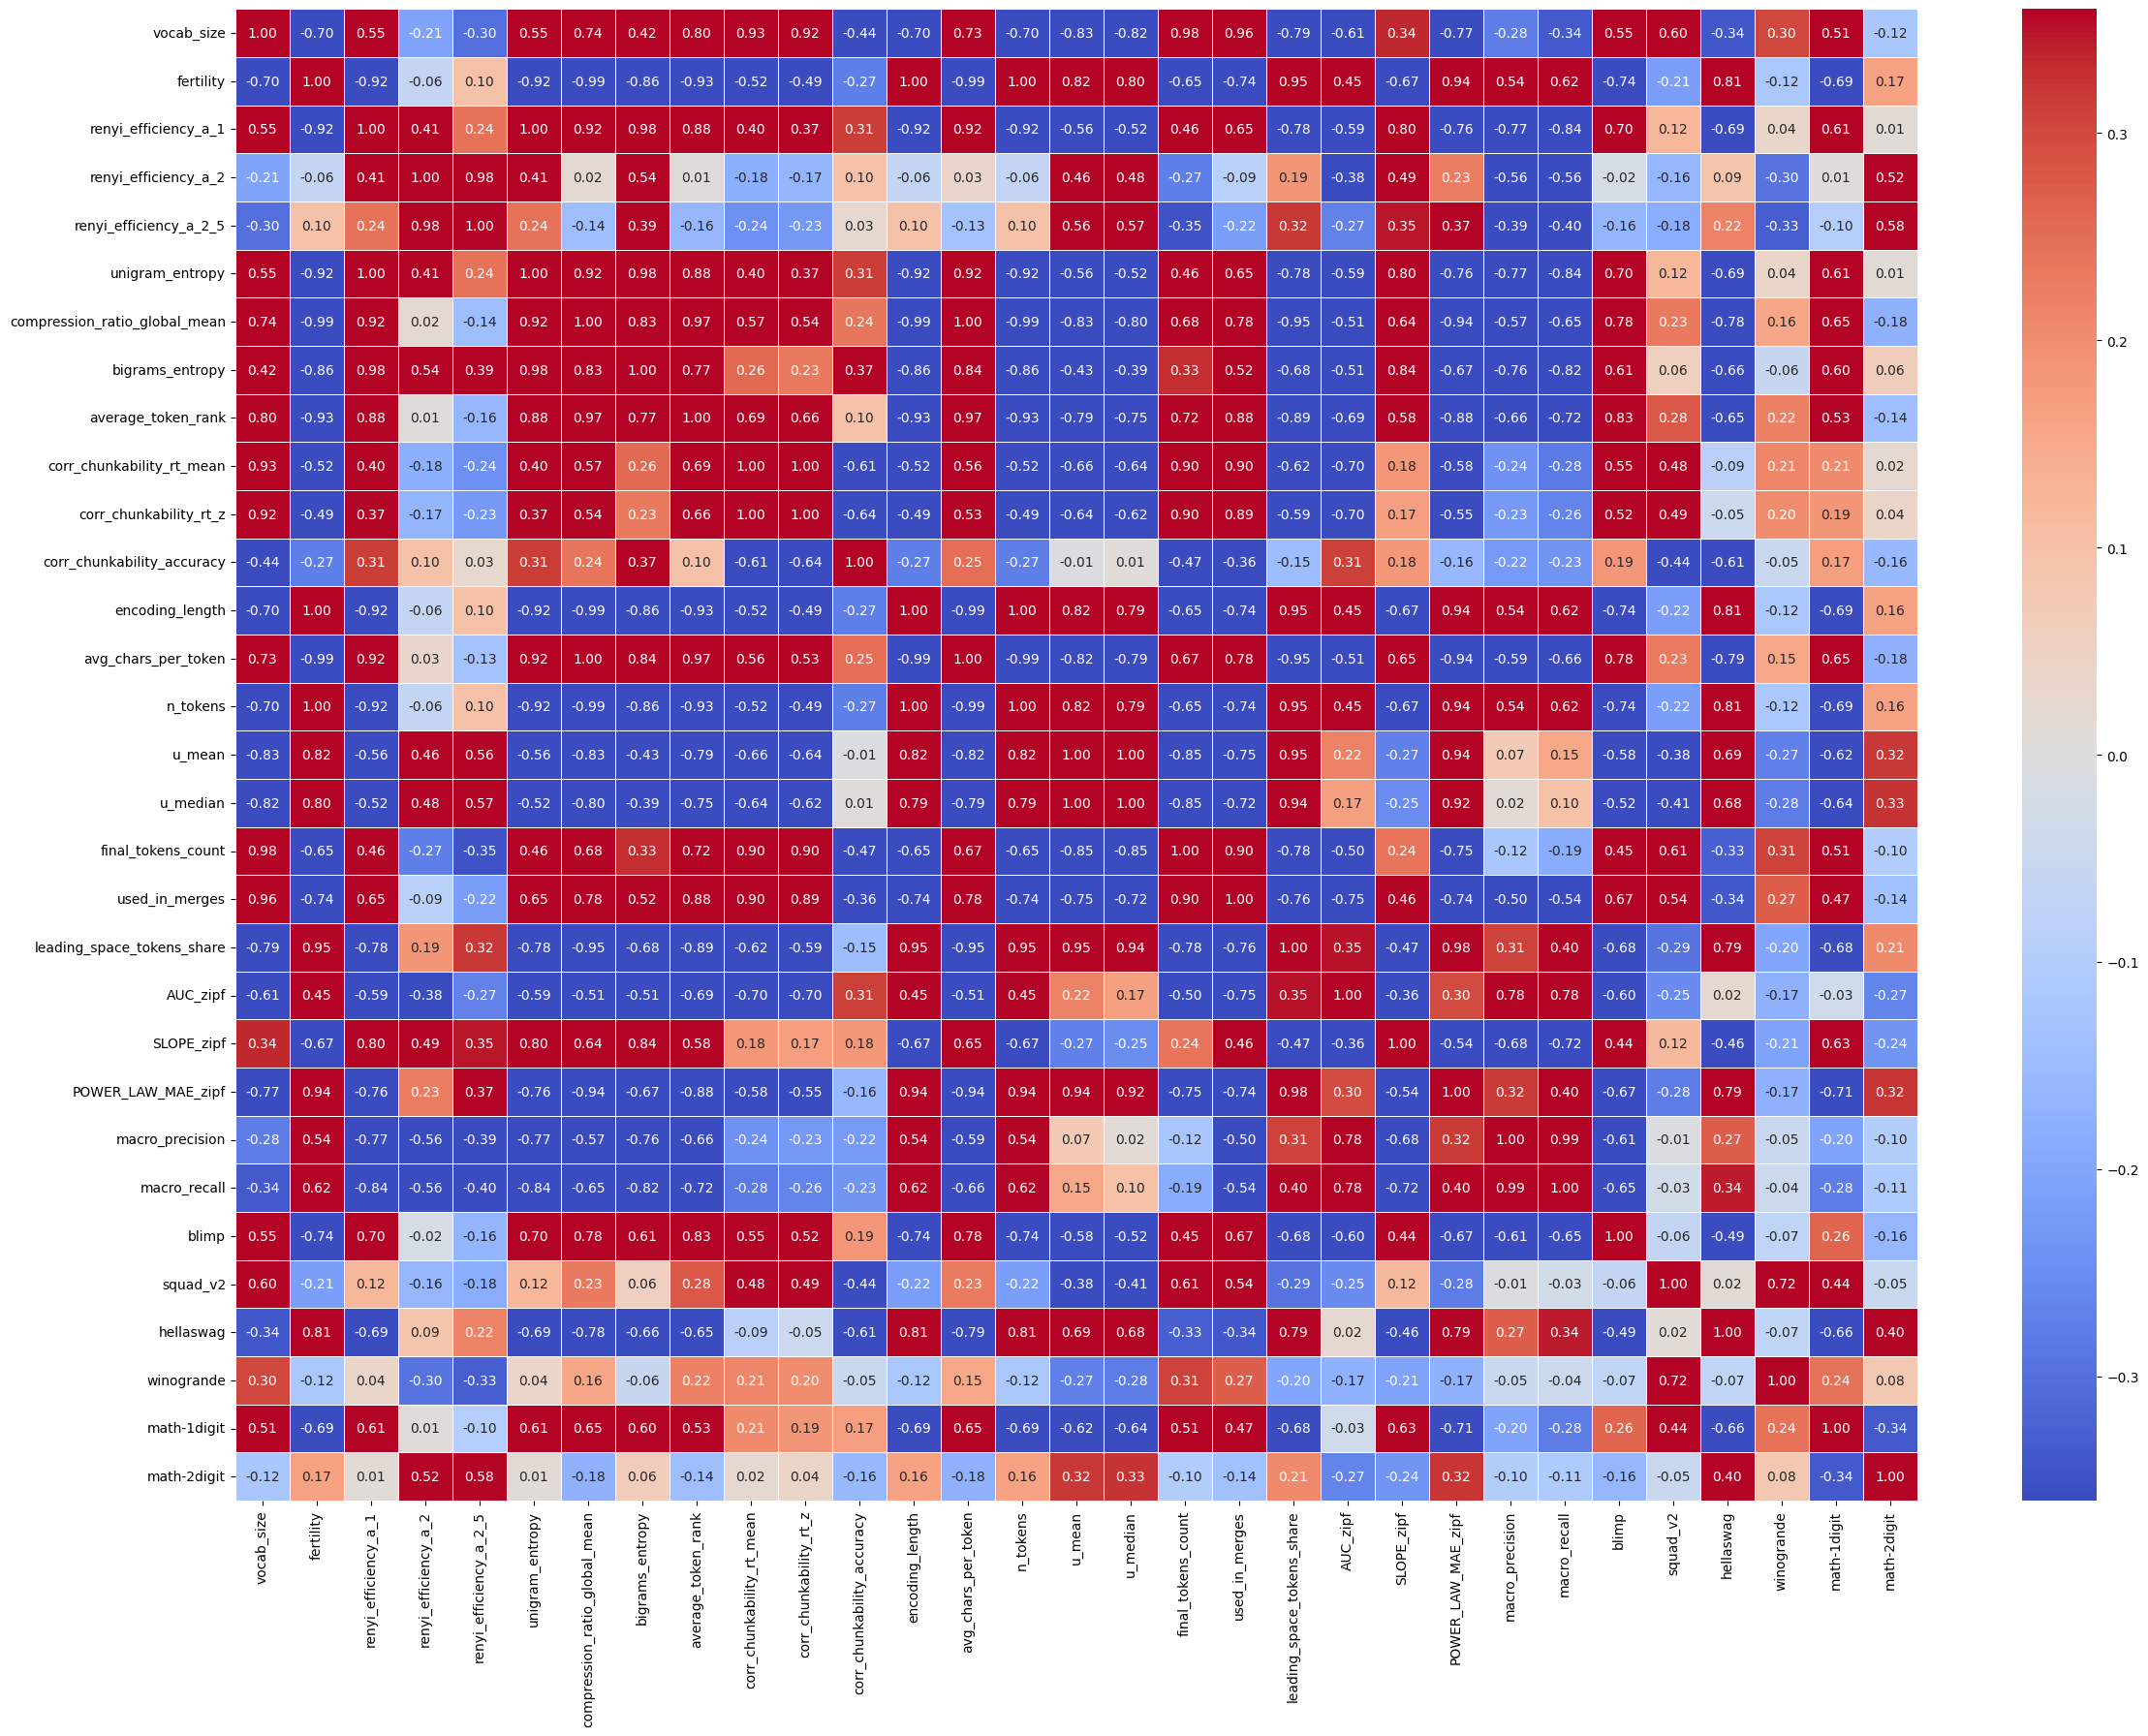

In [18]:
plt.figure(figsize=(28, 20))
hmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-0.36,
    vmax=0.36,
)

In [19]:
ordered_mod_cols = ['blimp', 'squad_v2', 'winogrande', 'hellaswag', 'math-1digit', 'math-2digit']

In [20]:
ordered_mod_cols

['blimp', 'squad_v2', 'winogrande', 'hellaswag', 'math-1digit', 'math-2digit']

In [21]:
assert set(ordered_mod_cols) == set(mod_cols)

In [22]:
masked_corr = corr_matrix.loc[ordered_mod_cols, tok_cols]
masked_corr_sq = masked_corr * abs(masked_corr)

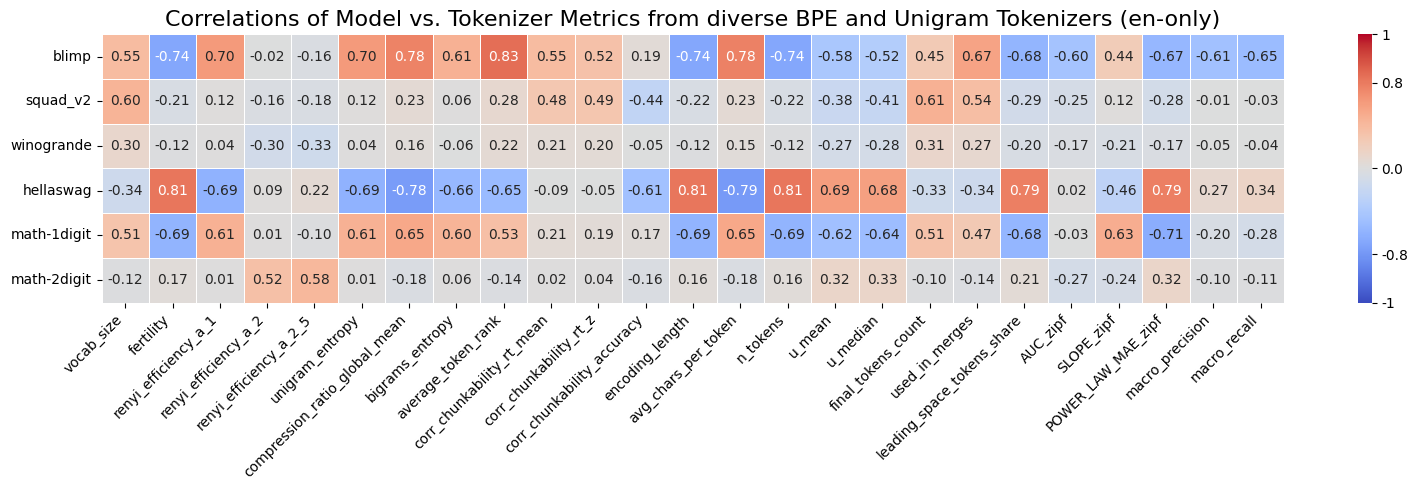

In [35]:
plt.figure(figsize=(16, 5))
hmap = sns.heatmap(
    masked_corr_sq,
    annot=masked_corr, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-1,
    vmax=1,
)
plt.title('Correlations of Model vs. Tokenizer Metrics from diverse BPE and Unigram Tokenizers (en-only)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
cbar = hmap.collections[0].colorbar
cbar.set_ticks([-1, -0.64, 0.0, 0.64, 1])
cbar.set_ticklabels(['-1', '-0.8', '0.0', '0.8', '1'])
# cbar.set_ticks([-0.36, -0.16, 0.0, 0.16, 0.36])
# cbar.set_ticklabels(['-0.6', '-0.4', '0.0', '0.4', '0.6'])
plt.show()

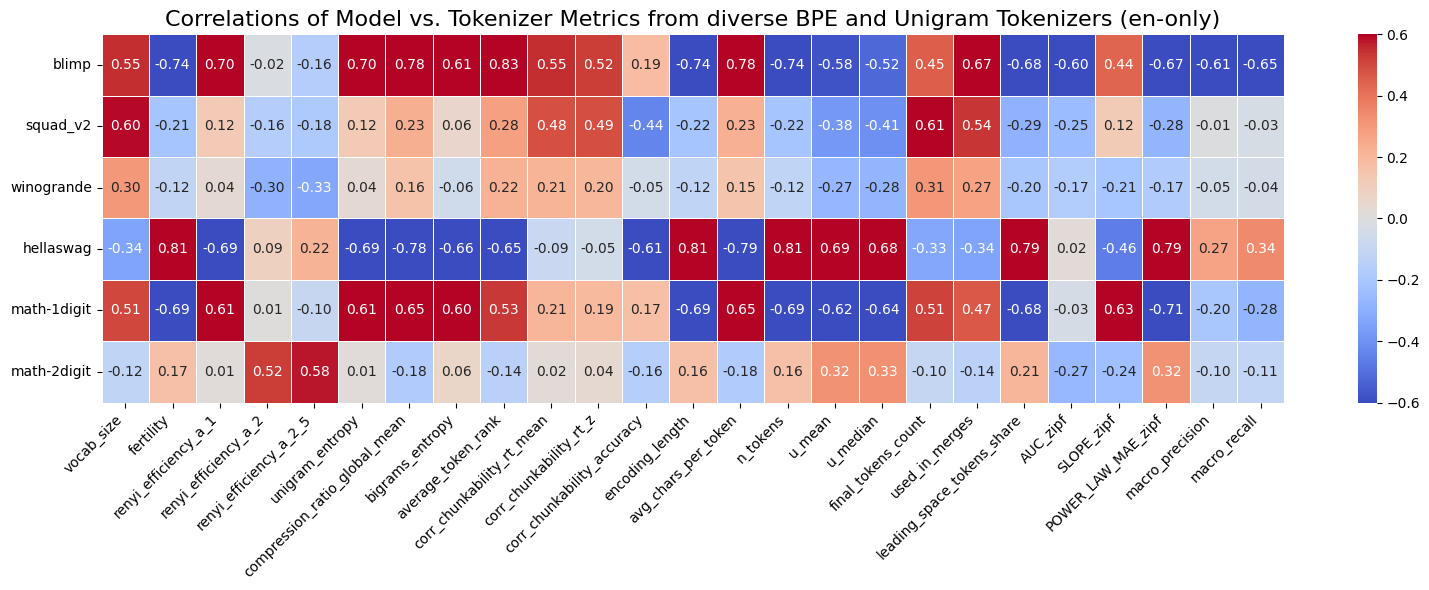

In [28]:
plt.figure(figsize=(16, 6))
hmap = sns.heatmap(
    masked_corr,
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    vmin=-.6,
    vmax=.6,
)
plt.title('Correlations of Model vs. Tokenizer Metrics from diverse BPE and Unigram Tokenizers (en-only)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()